In [373]:
import pandas as pd
import numpy as np
import sys, os
import matplotlib.pyplot as plt
import seaborn as sns

In [374]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
   sys.path.append(project_root)

from source.utils.minio_helper import read_df_from_minio

In [375]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) # Agar list panjang tidak terpotong

BUCKET_NAME = "mlbb-lakehouse"

In [376]:
print("📥 Loading Silver Data...")
df_draft = read_df_from_minio(BUCKET_NAME, "silver/silver_draft_heroes.parquet", file_format='parquet')
df_enriched = read_df_from_minio(BUCKET_NAME, "silver/silver_draft_enriched.parquet", file_format='parquet')
df_dq = read_df_from_minio(BUCKET_NAME, "silver/silver_data_quality.parquet", file_format='parquet')

print(f"1. Draft Heroes (Base): {df_draft.shape if df_draft is not None else 'Gagal'}")
print(f"2. Enriched Data: {df_enriched.shape if df_enriched is not None else 'Gagal'}")
print(f"3. Data Quality Issues: {df_dq.shape if df_dq is not None else '0 Issues (Perfect)'}")

📥 Loading Silver Data...
[MINIO] Error Read: silver/silver_data_quality.parquet: S3 operation failed; code: NoSuchKey, message: The specified key does not exist., resource: /mlbb-lakehouse/silver/silver_data_quality.parquet, request_id: 1882F2168DA25C57, host_id: dd9025bab4ad464b049177c95eb6ebf374d3b3fd1af9251148b658df7ac2e3e8, bucket_name: mlbb-lakehouse, object_name: silver/silver_data_quality.parquet
1. Draft Heroes (Base): (8276, 11)
2. Enriched Data: (8276, 21)
3. Data Quality Issues: 0 Issues (Perfect)


In [377]:
if df_draft is not None:
    print("🔍 VALIDASI GRANULARITAS (Explode):")
    
    # Hitung berapa baris per match_id
    rows_per_match = df_draft.groupby('match_id').size()
    
    print("\nDistribusi Jumlah Baris per Match:")
    print(rows_per_match.value_counts().sort_index())
    
    # Analisis
    # Idealnya: 5 Pick Kiri + 5 Pick Kanan = 10 Pick
    # Ditambah Ban (biasanya 3-5 per tim) -> Total sekitar 16-20 baris per match
    
    print("\nContoh Match ID 1:")
    display(df_draft[df_draft['match_id'] == 1].sort_values(['team_side', 'phase', 'order']))

🔍 VALIDASI GRANULARITAS (Explode):

Distribusi Jumlah Baris per Match:
19      4
20    410
Name: count, dtype: int64

Contoh Match ID 1:


,match_id,region,tournament,team_side,team_name,phase,order,hero_name_normalized,is_winner_team,source_file,ingested_at
5,1,ID,MPL ID S16,left,ONICONIC,ban,1,wanwan,True,mpl_id_s16.csv,2025-12-20 22:11:18
6,1,ID,MPL ID S16,left,ONICONIC,ban,2,yisunshin,True,mpl_id_s16.csv,2025-12-20 22:11:18
7,1,ID,MPL ID S16,left,ONICONIC,ban,3,fanny,True,mpl_id_s16.csv,2025-12-20 22:11:18
8,1,ID,MPL ID S16,left,ONICONIC,ban,4,selena,True,mpl_id_s16.csv,2025-12-20 22:11:18
9,1,ID,MPL ID S16,left,ONICONIC,ban,5,uranus,True,mpl_id_s16.csv,2025-12-20 22:11:18
0,1,ID,MPL ID S16,left,ONICONIC,pick,1,cici,True,mpl_id_s16.csv,2025-12-20 22:11:18
1,1,ID,MPL ID S16,left,ONICONIC,pick,2,joy,True,mpl_id_s16.csv,2025-12-20 22:11:18
2,1,ID,MPL ID S16,left,ONICONIC,pick,3,pharsa,True,mpl_id_s16.csv,2025-12-20 22:11:18
3,1,ID,MPL ID S16,left,ONICONIC,pick,4,claude,True,mpl_id_s16.csv,2025-12-20 22:11:18
4,1,ID,MPL ID S16,left,ONICONIC,pick,5,hylos,True,mpl_id_s16.csv,2025-12-20 22:11:18


In [378]:
print(df_draft[df_draft['match_id'] == 1].sort_values(['team_side', 'phase', 'order']))

    match_id region  tournament team_side        team_name phase  order  \
5          1     ID  MPL ID S16      left         ONICONIC   ban      1   
6          1     ID  MPL ID S16      left         ONICONIC   ban      2   
7          1     ID  MPL ID S16      left         ONICONIC   ban      3   
8          1     ID  MPL ID S16      left         ONICONIC   ban      4   
9          1     ID  MPL ID S16      left         ONICONIC   ban      5   
0          1     ID  MPL ID S16      left         ONICONIC  pick      1   
1          1     ID  MPL ID S16      left         ONICONIC  pick      2   
2          1     ID  MPL ID S16      left         ONICONIC  pick      3   
3          1     ID  MPL ID S16      left         ONICONIC  pick      4   
4          1     ID  MPL ID S16      left         ONICONIC  pick      5   
15         1     ID  MPL ID S16     right  Dewa UnitedDEWA   ban      1   
16         1     ID  MPL ID S16     right  Dewa UnitedDEWA   ban      2   
17         1     ID  MPL 

🔍 VALIDASI ENRICHMENT (Business Logic):

Statistik Deskriptif:


,win_rate,tier_score,counter_score
count,8276.000000,8276.000000,8276.000000
mean,49.568192,2.108869,0.078026
std,2.712070,1.669159,0.293933
min,43.850000,0.000000,0.000000
25%,47.430000,1.000000,0.000000
50%,49.950000,1.000000,0.000000
75%,50.840000,4.000000,0.000000
max,56.830000,5.000000,4.620000


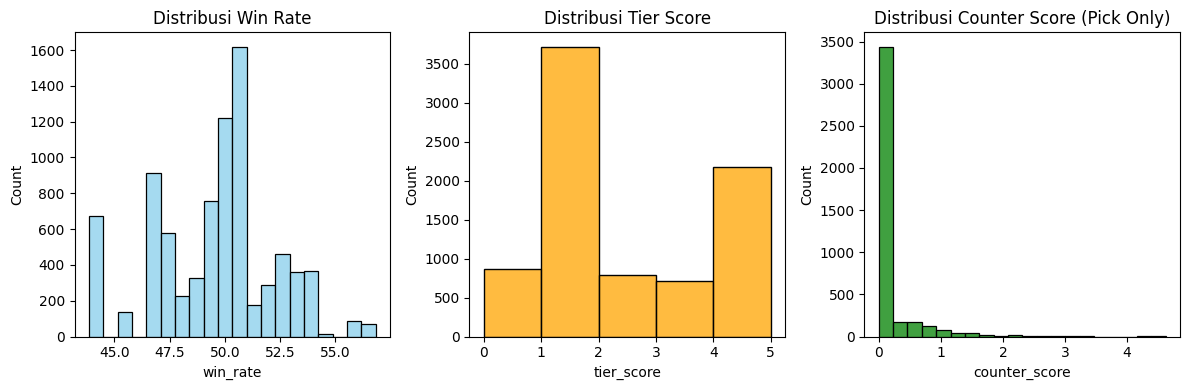

In [379]:
if df_enriched is not None:
    print("🔍 VALIDASI ENRICHMENT (Business Logic):")
    
    # Cek statistik deskriptif untuk kolom numerik penting
    cols_to_check = ['win_rate', 'tier_score', 'counter_score']
    
    print("\nStatistik Deskriptif:")
    display(df_enriched[cols_to_check].describe())
    
    # Visualisasi Cepat: Apakah Counter Score bervariasi?
    # Jika grafiknya hanya satu batang di angka 0, berarti logika hitung score SALAH.
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    sns.histplot(df_enriched['win_rate'], bins=20, color='skyblue')
    plt.title('Distribusi Win Rate')
    
    plt.subplot(1, 3, 2)
    sns.histplot(df_enriched['tier_score'], bins=5, color='orange')
    plt.title('Distribusi Tier Score')
    
    plt.subplot(1, 3, 3)
    # Filter phase pick saja, karena phase ban counter_score pasti 0/null
    pick_only = df_enriched[df_enriched['phase'] == 'pick']
    sns.histplot(pick_only['counter_score'], bins=20, color='green')
    plt.title('Distribusi Counter Score (Pick Only)')
    
    plt.tight_layout()
    plt.show()

In [380]:
print(df_enriched.head())

   match_id region  tournament team_side team_name phase  order  \
0         1     ID  MPL ID S16      left  ONICONIC  pick      1   
1         1     ID  MPL ID S16      left  ONICONIC  pick      2   
2         1     ID  MPL ID S16      left  ONICONIC  pick      3   
3         1     ID  MPL ID S16      left  ONICONIC  pick      4   
4         1     ID  MPL ID S16      left  ONICONIC  pick      5   

  hero_name_normalized  is_winner_team     source_file          ingested_at  \
0                 cici            True  mpl_id_s16.csv  2025-12-20 22:11:18   
1                  joy            True  mpl_id_s16.csv  2025-12-20 22:11:18   
2               pharsa            True  mpl_id_s16.csv  2025-12-20 22:11:18   
3               claude            True  mpl_id_s16.csv  2025-12-20 22:11:18   
4                hylos            True  mpl_id_s16.csv  2025-12-20 22:11:18   

   win_rate  pick_rate  ban_rate      role       lane        speciality  \
0     50.48       1.08     14.72   fighter   ex

In [381]:
cols = df_enriched[['match_id', 'tournament', 'team_name', 'team_side', 'hero_name_normalized', 'counter_score']]

In [382]:
print('TEAM LEFT')
print(cols[cols['team_side'] == 'left'])
print('TEAM RIGHT')
print(cols[cols['team_side'] == 'right'])

TEAM LEFT
      match_id  tournament  team_name team_side hero_name_normalized  \
0            1  MPL ID S16   ONICONIC      left                 cici   
1            1  MPL ID S16   ONICONIC      left                  joy   
2            1  MPL ID S16   ONICONIC      left               pharsa   
3            1  MPL ID S16   ONICONIC      left               claude   
4            1  MPL ID S16   ONICONIC      left                hylos   
...        ...         ...        ...       ...                  ...   
8261       414  MPL MY S16  SRG.OGSRG      left                baxia   
8262       414  MPL MY S16  SRG.OGSRG      left               arlott   
8263       414  MPL MY S16  SRG.OGSRG      left             fredrinn   
8264       414  MPL MY S16  SRG.OGSRG      left            benedetta   
8265       414  MPL MY S16  SRG.OGSRG      left             mathilda   

      counter_score  
0              0.68  
1              0.00  
2              0.00  
3              0.00  
4              

In [383]:
display(df_enriched[df_enriched['match_id'] == 1].sort_values(['team_side', 'phase', 'order']))

,match_id,region,tournament,team_side,team_name,phase,order,hero_name_normalized,is_winner_team,source_file,ingested_at,win_rate,pick_rate,ban_rate,role,lane,speciality,tier_score,score,counter_score,processed_at
5,1,ID,MPL ID S16,left,ONICONIC,ban,1,wanwan,True,mpl_id_s16.csv,2025-12-20 22:11:18,49.41,0.27,0.99,marksman,gold lane,"Finisher, Burst",1,102.2460,0.00,2025-12-20 22:16:10
6,1,ID,MPL ID S16,left,ONICONIC,ban,2,yisunshin,True,mpl_id_s16.csv,2025-12-20 22:11:18,52.79,1.46,35.05,"assassin, marksman",jungle,"Finisher, Chase",5,518.9960,0.00,2025-12-20 22:16:10
7,1,ID,MPL ID S16,left,ONICONIC,ban,3,fanny,True,mpl_id_s16.csv,2025-12-20 22:11:18,44.26,0.62,7.22,assassin,jungle,"Chase, Finisher",3,164.3950,0.00,2025-12-20 22:16:10
8,1,ID,MPL ID S16,left,ONICONIC,ban,4,selena,True,mpl_id_s16.csv,2025-12-20 22:11:18,47.01,0.64,1.64,"assassin, mage","mid lane, roam","Initiator, Finisher",0,93.4980,0.00,2025-12-20 22:16:10
9,1,ID,MPL ID S16,left,ONICONIC,ban,5,uranus,True,mpl_id_s16.csv,2025-12-20 22:11:18,50.66,0.38,1.87,tank,exp lane,Regen,1,103.3280,0.00,2025-12-20 22:16:10
0,1,ID,MPL ID S16,left,ONICONIC,pick,1,cici,True,mpl_id_s16.csv,2025-12-20 22:11:18,50.48,1.08,14.72,fighter,exp lane,"Damage, Regen",4,306.0420,0.68,2025-12-20 22:16:10
1,1,ID,MPL ID S16,left,ONICONIC,pick,2,joy,True,mpl_id_s16.csv,2025-12-20 22:11:18,51.36,0.46,3.62,assassin,jungle,"Chase, Damage",2,134.3650,0.00,2025-12-20 22:16:10
2,1,ID,MPL ID S16,left,ONICONIC,pick,3,pharsa,True,mpl_id_s16.csv,2025-12-20 22:11:18,49.17,0.94,0.92,mage,mid lane,"Burst, Poke",1,99.8831,0.00,2025-12-20 22:16:10
3,1,ID,MPL ID S16,left,ONICONIC,pick,4,claude,True,mpl_id_s16.csv,2025-12-20 22:11:18,52.40,0.67,0.25,marksman,gold lane,"Burst, Chase",0,92.2430,0.00,2025-12-20 22:16:10
4,1,ID,MPL ID S16,left,ONICONIC,pick,5,hylos,True,mpl_id_s16.csv,2025-12-20 22:11:18,50.44,0.45,0.82,tank,roam,"Guard, Initiator",1,98.9064,0.00,2025-12-20 22:16:10


In [384]:
print("\nStatistik Deskriptif:")
print(df_enriched[cols_to_check].describe())


Statistik Deskriptif:
          win_rate   tier_score  counter_score
count  8276.000000  8276.000000    8276.000000
mean     49.568192     2.108869       0.078026
std       2.712070     1.669159       0.293933
min      43.850000     0.000000       0.000000
25%      47.430000     1.000000       0.000000
50%      49.950000     1.000000       0.000000
75%      50.840000     4.000000       0.000000
max      56.830000     5.000000       4.620000


In [385]:
if df_dq is not None:
    print("🔍 VALIDASI DATA QUALITY:")
    
    # Hitung jumlah isu per tipe
    print("\nJumlah Isu per Kategori:")
    print(df_dq['issue_type'].value_counts())
    
    # Lihat sampel isu HERO_NOT_FOUND
    # Ini memberi tahu kita hero apa yang namanya beda antara MPL vs Master Stats
    print("\nTop 10 Hero yang Gagal Join Stats (Perlu Normalisasi di Silver?):")
    hero_issues = df_dq[df_dq['issue_type'] == 'HERO_NOT_FOUND_IN_MASTER']
    print(hero_issues['hero_name_normalized'].value_counts().head(10))
    
    print("\nContoh Detail Isu:")
    display(df_dq)
    print(df_dq)
else:
    print("🎉 Data bersih sempurna! Tidak ada isu yang tercatat.")

🎉 Data bersih sempurna! Tidak ada isu yang tercatat.


In [386]:
if df_enriched is not None:
    print("🔍 AUDIT KEKOSONGAN DATA (Zero Check):")
    
    total_rows = len(df_enriched)
    
    # Hitung persentase nilai 0 pada kolom penting
    # Ingat: Kita tadi fillna(0). Jadi 0 bisa berarti "memang 0" atau "datanya hilang".
    
    zero_wr = len(df_enriched[df_enriched['win_rate'] == 0])
    zero_tier = len(df_enriched[df_enriched['tier_score'] == 0])
    
    # Khusus Counter Score, kita hanya peduli pada phase PICK
    pick_rows = df_enriched[df_enriched['phase'] == 'pick']
    zero_counter = len(pick_rows[pick_rows['counter_score'] == 0])
    
    print(f"Total Baris: {total_rows}")
    print(f"1. Win Rate = 0: {zero_wr} baris ({zero_wr/total_rows:.1%}) -> { '⚠️ Bahaya' if (zero_wr/total_rows) > 0.2 else '✅ Aman'}")
    print(f"2. Tier Score = 0: {zero_tier} baris ({zero_tier/total_rows:.1%}) -> { '⚠️ Bahaya' if (zero_tier/total_rows) > 0.2 else '✅ Aman'}")
    print(f"3. Counter Score = 0 (Pick Only): {zero_counter} baris ({zero_counter/len(pick_rows):.1%}) -> { '⚠️ Cek Logika' if (zero_counter/len(pick_rows)) > 0.5 else '✅ Aman'}")

🔍 AUDIT KEKOSONGAN DATA (Zero Check):
Total Baris: 8276
1. Win Rate = 0: 0 baris (0.0%) -> ✅ Aman
2. Tier Score = 0: 874 baris (10.6%) -> ✅ Aman
3. Counter Score = 0 (Pick Only): 2988 baris (72.2%) -> ⚠️ Cek Logika


In [387]:
# 1. Load Data Mentah (Bronze)
df_matches = read_df_from_minio(BUCKET_NAME, "bronze/tournament_matches/bronze_mpl_matches.parquet", file_format='parquet')
df_counter = read_df_from_minio(BUCKET_NAME, "bronze/counter_hero/bronze_hero_counter.parquet", file_format='parquet')
df_meta = read_df_from_minio(BUCKET_NAME, "bronze/meta/bronze_hero_meta.parquet", file_format='parquet')

# 2. Investigasi: TIER SCORE (Meta vs Match)
print(f"\n{'='*40}\nKASUS 1: TIER SCORE BANYAK 0\n{'='*40}")

# Ambil sampel nama hero dari Match (Picks)
sample_match_heroes = set()
for picks in df_matches['left_picks_normalized'].head(20):
    if isinstance(picks, list):
        sample_match_heroes.update(picks)

# Ambil sampel nama hero dari Meta
meta_heroes = set(df_meta['hero_name_normalized'].unique())

# Cari Irisan (Yang Cocok) dan Selisih (Yang Gagal)
matched = sample_match_heroes.intersection(meta_heroes)
missing = sample_match_heroes.difference(meta_heroes)

print(f"Total Sampel Hero di Match: {len(sample_match_heroes)}")
print(f"Berhasil Match dengan Meta: {len(matched)}")
print(f"Gagal Match dengan Meta   : {len(missing)}")

if len(missing) > 0:
    print("\n⚠️ DAFTAR HERO YANG GAGAL JOIN KE META (Perhatikan Ejaannya!):")
    print(list(missing)[:10])
    
    print("\nVS Ejaan yang ada di Meta (Cari yang mirip):")
    # Cari nama di meta yang mirip dengan yang hilang (misal 'yi' ada di mana?)
    for m in missing:
        similar = [h for h in meta_heroes if m[:3] in h] # Cek 3 huruf depan
        print(f"   Match: '{m}'  <--> Meta punya: {similar}")
else:
    print("✅ Semua nama hero Match ada di Meta. Aneh jika Tier Score 0.")

# 3. Investigasi: COUNTER SCORE (Counter vs Match)
print(f"\n{'='*40}\nKASUS 2: COUNTER SCORE BANYAK 0\n{'='*40}")

# Buat Dictionary Counter (Persis seperti di kode silver)
counter_dict = {}
if df_counter is not None:
    for t, c, s in zip(df_counter['hero_name_normalized'], df_counter['counter_name_normalized'], df_counter['score']):
        counter_dict[(t, c)] = s

print(f"Jumlah Rules di Counter Dictionary: {len(counter_dict)}")

# Ambil 1 Match untuk simulasi
row = df_matches.iloc[0]
left_heroes = row['left_picks_normalized'] # Misal: ['cici', 'joy', ...]
right_heroes = row['right_picks_normalized'] # Misal: ['esmeralda', ...]

print(f"\nSimulasi Match ID 1:")
print(f"Tim Kiri (Hero Kita) : {left_heroes}")
print(f"Tim Kanan (Musuh)    : {right_heroes}")

print("\n--- Simulasi Lookup Satu per Satu ---")
# Kita coba hitung manual
hero_kita = left_heroes[0] # Ambil hero pertama
print(f"Hero yang dicek: '{hero_kita}'")

for musuh in right_heroes:
    key = (hero_kita, musuh)
    
    # Cek apakah key ada di dictionary
    is_found = key in counter_dict
    score = counter_dict.get(key, 0.0)
    
    status = "✅ KETEMU" if is_found else "❌ TIDAK KETEMU"
    print(f"   Lawan '{musuh}': Key={key} -> {status} (Score: {score})")
    
    if not is_found:
        # Coba debug kenapa tidak ketemu
        # Cek apakah hero kita ada sama sekali di dictionary sebagai target?
        ada_di_target = any(k[0] == hero_kita for k in counter_dict.keys())
        ada_di_counter = any(k[1] == musuh for k in counter_dict.keys())
        print(f"      -> Diagnosa: '{hero_kita}' ada di data counter? {ada_di_target}")
        print(f"      -> Diagnosa: '{musuh}' ada di data counter? {ada_di_counter}")


KASUS 1: TIER SCORE BANYAK 0
Total Sampel Hero di Match: 0
Berhasil Match dengan Meta: 0
Gagal Match dengan Meta   : 0
✅ Semua nama hero Match ada di Meta. Aneh jika Tier Score 0.

KASUS 2: COUNTER SCORE BANYAK 0
Jumlah Rules di Counter Dictionary: 1402

Simulasi Match ID 1:
Tim Kiri (Hero Kita) : ['cici' 'joy' 'pharsa' 'claude' 'hylos']
Tim Kanan (Musuh)    : ['esmeralda' 'lancelot' 'helcurt' 'harith' 'gatotkaca']

--- Simulasi Lookup Satu per Satu ---
Hero yang dicek: 'cici'
   Lawan 'esmeralda': Key=('cici', 'esmeralda') -> ❌ TIDAK KETEMU (Score: 0.0)
      -> Diagnosa: 'cici' ada di data counter? True
      -> Diagnosa: 'esmeralda' ada di data counter? True
   Lawan 'lancelot': Key=('cici', 'lancelot') -> ❌ TIDAK KETEMU (Score: 0.0)
      -> Diagnosa: 'cici' ada di data counter? True
      -> Diagnosa: 'lancelot' ada di data counter? True
   Lawan 'helcurt': Key=('cici', 'helcurt') -> ❌ TIDAK KETEMU (Score: 0.0)
      -> Diagnosa: 'cici' ada di data counter? True
      -> Diagnosa

In [388]:
# Ambil 1 Match untuk simulasi
row = df_matches.iloc[11]
left_heroes = row['left_picks_normalized'] # Misal: ['cici', 'joy', ...]
right_heroes = row['right_picks_normalized'] # Misal: ['esmeralda', ...]

print(f"\nSimulasi Match ID 1:")
print(f"Tim Kiri (Hero Kita) : {left_heroes}")
print(f"Tim Kanan (Musuh)    : {right_heroes}")

print("\n--- Simulasi Lookup Satu per Satu ---")
# Kita coba hitung manual
hero_kita = left_heroes[4] # Ambil hero pertama
print(f"Hero yang dicek: '{hero_kita}'")

for musuh in right_heroes:
    key = (hero_kita, musuh)
    
    # Cek apakah key ada di dictionary
    is_found = key in counter_dict
    score = counter_dict.get(key, 0.0)
    
    status = "✅ KETEMU" if is_found else "❌ TIDAK KETEMU"
    print(f"   Lawan '{musuh}': Key={key} -> {status} (Score: {score})")
    
    if not is_found:
        # Coba debug kenapa tidak ketemu
        # Cek apakah hero kita ada sama sekali di dictionary sebagai target?
        ada_di_target = any(k[0] == hero_kita for k in counter_dict.keys())
        ada_di_counter = any(k[1] == musuh for k in counter_dict.keys())
        print(f"      -> Diagnosa: '{hero_kita}' ada di data counter? {ada_di_target}")
        print(f"      -> Diagnosa: '{musuh}' ada di data counter? {ada_di_counter}")


Simulasi Match ID 1:
Tim Kiri (Hero Kita) : ['chou' 'hayabusa' 'kimmy' 'claude' 'gatotkaca']
Tim Kanan (Musuh)    : ['ruby' 'lancelot' 'zhuxin' 'granger' 'kalea']

--- Simulasi Lookup Satu per Satu ---
Hero yang dicek: 'gatotkaca'
   Lawan 'ruby': Key=('gatotkaca', 'ruby') -> ❌ TIDAK KETEMU (Score: 0.0)
      -> Diagnosa: 'gatotkaca' ada di data counter? True
      -> Diagnosa: 'ruby' ada di data counter? True
   Lawan 'lancelot': Key=('gatotkaca', 'lancelot') -> ❌ TIDAK KETEMU (Score: 0.0)
      -> Diagnosa: 'gatotkaca' ada di data counter? True
      -> Diagnosa: 'lancelot' ada di data counter? True
   Lawan 'zhuxin': Key=('gatotkaca', 'zhuxin') -> ❌ TIDAK KETEMU (Score: 0.0)
      -> Diagnosa: 'gatotkaca' ada di data counter? True
      -> Diagnosa: 'zhuxin' ada di data counter? True
   Lawan 'granger': Key=('gatotkaca', 'granger') -> ✅ KETEMU (Score: 0.2049999982118606)
   Lawan 'kalea': Key=('gatotkaca', 'kalea') -> ❌ TIDAK KETEMU (Score: 0.0)
      -> Diagnosa: 'gatotkaca' ada d

In [389]:
import re

def normalize_name_strict(text):
    if not isinstance(text, str): return ""
    clean = text.lower()
    clean = re.sub(r'[^a-z0-9]', '', clean) 
    return clean

def manual_test_score(hero_kita, list_musuh, debug=True):
    hero_norm = normalize_name_strict(hero_kita)
    musuh_norm = [normalize_name_strict(m) for m in list_musuh]
    
    total = 0
    count = 0
    
    print(f"\n🧪 Tes: {hero_kita} vs {list_musuh}")
    
    for musuh in musuh_norm:
        score = counter_dict.get((hero_norm, musuh), 0.0)
        if debug:
            found_txt = "✅ KETEMU" if (hero_norm, musuh) in counter_dict else "❌ KOSONG"
            print(f"   Lawan '{musuh}': {found_txt} | Score: {score}")
        total += score
        count += 1
        
    avg = round(total / count, 2) if count > 0 else 0
    print(f"   >> Rata-rata Score: {avg}")
    return avg

# 1. Tes Positif (Harus Tinggi)
# Phoveus vs Wanwan (Seharusnya Counter Keras)
manual_test_score("Fanny", ["Bruno", "Zilong", "Franco", "Obsidia"])

# 2. Tes Negatif (Harus Rendah/Nol)
# Layla vs Tigreal (Biasanya tidak ada data khusus)
manual_test_score("Miya", ["Sora", "Belerick"])

# 3. Tes Ejaan (Cek Normalisasi)
# Yi Sun-shin (Spasi/Strip) vs Hero Lain
manual_test_score("Balmond", ["Sora", "Cici", "Xborg"])

manual_test_score("Bruno", ["Fanny", "Chip", "Claude"])

manual_test_score("Lancelot", ["Cici", 'Harith'])

manual_test_score("Esmeralda", ["Estes", 'Harith'])

manual_test_score("Balmond", ["Sora", "Cici", "Xborg", "Angela", "Diggie", "Ling", "Estes", "Valir", 'Yve'])


🧪 Tes: Fanny vs ['Bruno', 'Zilong', 'Franco', 'Obsidia']
   Lawan 'bruno': ✅ KETEMU | Score: 6.178999900817871
   Lawan 'zilong': ✅ KETEMU | Score: 5.59499979019165
   Lawan 'franco': ✅ KETEMU | Score: 4.34499979019165
   Lawan 'obsidia': ✅ KETEMU | Score: 4.119999885559082
   >> Rata-rata Score: 5.06

🧪 Tes: Miya vs ['Sora', 'Belerick']
   Lawan 'sora': ✅ KETEMU | Score: 7.138999938964844
   Lawan 'belerick': ✅ KETEMU | Score: 7.111999988555908
   >> Rata-rata Score: 7.13

🧪 Tes: Balmond vs ['Sora', 'Cici', 'Xborg']
   Lawan 'sora': ✅ KETEMU | Score: 7.754000186920166
   Lawan 'cici': ✅ KETEMU | Score: 6.89300012588501
   Lawan 'xborg': ✅ KETEMU | Score: 6.080999851226807
   >> Rata-rata Score: 6.91

🧪 Tes: Bruno vs ['Fanny', 'Chip', 'Claude']
   Lawan 'fanny': ❌ KOSONG | Score: 0.0
   Lawan 'chip': ✅ KETEMU | Score: 0.1990000009536743
   Lawan 'claude': ❌ KOSONG | Score: 0.0
   >> Rata-rata Score: 0.07

🧪 Tes: Lancelot vs ['Cici', 'Harith']
   Lawan 'cici': ✅ KETEMU | Score: 3.41899

4.22

In [390]:
print("🔬 Membangun Ulang Dictionary untuk Inspeksi...")

counter_dict = {}
sample_keys = []

if df_counter is not None:
    for t, c, s in zip(df_counter['hero_name_normalized'], df_counter['counter_name_normalized'], df_counter['score']):
        # Gunakan normalisasi strict
        k_hero = normalize_name_strict(t)
        k_counter = normalize_name_strict(c)
        counter_dict[(k_hero, k_counter)] = s
        
        # Simpan sampel untuk dilihat mata manusia
        if len(sample_keys) < 20:
            sample_keys.append(f"('{k_hero}', '{k_counter}') : {s}")

print(f"Total Rules di Dictionary: {len(counter_dict)}")
print("Contoh Key yang tersimpan:")
for k in sample_keys:
    print(f"  {k}")

🔬 Membangun Ulang Dictionary untuk Inspeksi...
Total Rules di Dictionary: 1402
Contoh Key yang tersimpan:
  ('miya', 'sora') : 7.138999938964844
  ('miya', 'belerick') : 7.111999988555908
  ('miya', 'gatotkaca') : 4.51200008392334
  ('miya', 'thamuz') : 3.494999885559082
  ('miya', 'baxia') : 3.374000072479248
  ('miya', 'terizla') : 2.4600000381469727
  ('miya', 'barats') : 1.633999943733215
  ('miya', 'fredrinn') : 0.3199999928474426
  ('miya', 'aulus') : 0.1280000060796737
  ('miya', 'luoyi') : 0.1120000034570694
  ('miya', 'granger') : 0.1110000014305114
  ('miya', 'hylos') : 0.0
  ('miya', 'lylia') : 0.0
  ('miya', 'carmilla') : 0.0
  ('balmond', 'sora') : 7.754000186920166
  ('balmond', 'cici') : 6.89300012588501
  ('balmond', 'xborg') : 6.080999851226807
  ('balmond', 'angela') : 5.787000179290772
  ('balmond', 'diggie') : 3.819999933242798
  ('balmond', 'ling') : 3.069999933242798


In [391]:
# Tampilkan salah satu key yang mengandung 'cici'
print([k for k in counter_dict.keys() if 'cici' in k][:20], end='\n')

[('balmond', 'cici'), ('alice', 'cici'), ('akai', 'cici'), ('lancelot', 'cici'), ('hylos', 'cici'), ('thamuz', 'cici'), ('yuzhong', 'cici'), ('benedetta', 'cici'), ('beatrix', 'cici'), ('cici', 'estes'), ('cici', 'aamon'), ('cici', 'sun'), ('cici', 'sora'), ('cici', 'xborg'), ('cici', 'diggie'), ('cici', 'odette'), ('cici', 'masha')]


In [392]:
# Cek apakah ada key dimana esmeralda bertemu cici
print("Cek Interaksi Langsung:")
print(f"Esme vs Cici: {counter_dict.get(('esmeralda', 'cici'))}")
print(f"Cici vs Esme: {counter_dict.get(('cici', 'esmeralda'))}")

# Cek semua hero yang dicounter Cici (Cici ada di posisi kanan/index 1)
targets_of_cici = [k[0] for k in counter_dict.keys() if k[1] == 'cici']
print(f"\nHero yang dicounter Cici ({len(targets_of_cici)}):")
print(targets_of_cici)

# Cek apakah esmeralda ada di list target tersebut
if 'esmeralda' in targets_of_cici:
    print("\nANEH: Esmeralda ada di list, tapi lookup gagal.")
else:
    print("\nKONFIRMASI: Esmeralda memang TIDAK ADA di data counter Cici.")

Cek Interaksi Langsung:
Esme vs Cici: None
Cici vs Esme: None

Hero yang dicounter Cici (9):
['balmond', 'alice', 'akai', 'lancelot', 'hylos', 'thamuz', 'yuzhong', 'benedetta', 'beatrix']

KONFIRMASI: Esmeralda memang TIDAK ADA di data counter Cici.
